In [44]:
years = list(range(1991, 2023))

In [45]:
url_start = "https://www.basketball-reference.com/leagues/NBA_{}.html"



In [46]:
import requests
import time

for year in years:
    url = url_start.format(year)
    time.sleep(3)
    data = requests.get(url)
    with open("season/{}.html".format(year), "w+") as f:
        f.write(data.text)
        

In [84]:
from bs4 import BeautifulSoup
import pandas as pd
dfs = []
for year in years:
    with open("season/{}.html".format(year)) as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    season_table = soup.find(id="switcher_totals_team-opponent")
    season = pd.read_html(str(season_table))[0]
    season["Year"] = year
    dfs.append(season)
seasons = pd.concat(dfs)



In [88]:

seasons["Team"] = seasons["Team"].apply(lambda x:  x[:len(x)-1] if x[-1] == '*' else x)
seasons = seasons.dropna()
season_total = seasons.groupby(by = "Year").mean()



Year
1991    0.314630
1992    0.325407
1993    0.331259
1994    0.332185
1995    0.358741
1996    0.365310
1997    0.359621
1998    0.343828
1999    0.336276
2000    0.352897
2001    0.351828
2002    0.351759
2003    0.346621
2004    0.345517
2005    0.353167
2006    0.356867
2007    0.356800
2008    0.360233
2009    0.365433
2010    0.352767
2011    0.356267
2012    0.347233
2013    0.357567
2014    0.358767
2015    0.349100
2016    0.352767
2017    0.357167
2018    0.361733
2019    0.355500
2020    0.357767
2021    0.366033
2022    0.353567
Name: 3P%, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

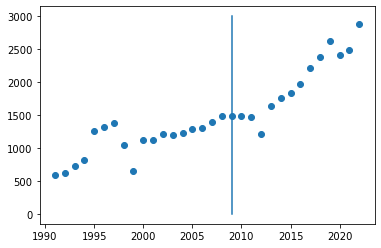

In [101]:
import matplotlib.pyplot as plt
ax = plt.axes()
ax.scatter(years, season_total["3PA"])
ax.plot([2009,2009],[0,3000])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

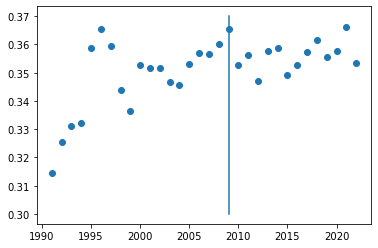

In [109]:
ax = plt.axes()
ax.scatter(years, season_total["3P%"])
ax.plot([2009,2009],[0.3,0.37])
plt.show

In [188]:
url_start = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html#expanded_standings"

In [190]:
for year in years:
    url = url_start.format(year)
    time.sleep(3)
    data = requests.get(url)
    with open("standing/{}.html".format(year), "w+") as f:
        f.write(data.text)

In [162]:
!pip install selenium
!pip install webdriver-manager

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.ie.service import Service as IEService
from webdriver_manager.microsoft import IEDriverManager
from webdriver_manager.chrome import ChromeDriverManager

In [191]:
options = Options()
options.binary_location = r'C:\Program Files\Google\Chrome\Application\chrome.exe'
chrome_driver_binary = r'C:\Users\jksok\Downloads\chromedriver_win32\chromedriver.exe'
driver = webdriver.Chrome(chrome_driver_binary, options=options)


/tmp/ipykernel_50/70513228.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_driver_binary, options=options)


WebDriverException: Message: unknown error: no chrome binary at C:\Program Files\Google\Chrome\Application\chrome.exe
Stacktrace:
#0 0x55edc5d642a3 <unknown>
#1 0x55edc5b22f77 <unknown>
#2 0x55edc5b48ed3 <unknown>
#3 0x55edc5b477d0 <unknown>
#4 0x55edc5b880b7 <unknown>
#5 0x55edc5b87a5f <unknown>
#6 0x55edc5b7f903 <unknown>
#7 0x55edc5b52ece <unknown>
#8 0x55edc5b53fde <unknown>
#9 0x55edc5db463e <unknown>
#10 0x55edc5db7b79 <unknown>
#11 0x55edc5d9a89e <unknown>
#12 0x55edc5db8a83 <unknown>
#13 0x55edc5d8d505 <unknown>
#14 0x55edc5dd9ca8 <unknown>
#15 0x55edc5dd9e36 <unknown>
#16 0x55edc5df5333 <unknown>
#17 0x7fc214ea2609 start_thread
